# 1. Looking at old_stft and new_stft

In [1]:
import numpy as np
from scipy import io
import h5py
import matplotlib.pyplot as plt

# old_stft = io.loadmat('old_stft.mat')# , {'new_stft_real': new_stft_real, 'new_stft_imag': new_stft_imag})old_stft = h5py.File("old_stft.mat", "r")
old_stft = h5py.File("old_stft.mat", "r")
stft_real_old = np.asarray(old_stft['old_stft_real'])
stft_imag_old = np.asarray(old_stft['old_stft_imag'])

# save new stft data
new_stft = io.loadmat('new_stft.mat')# , {'new_stft_real': new_stft_real, 'new_stft_imag': new_stft_imag})
stft_real_new = new_stft['stft_real_new']
stft_imag_new = new_stft['stft_imag_new']


In [2]:
stft_real_old.shape

(51, 65, 129, 16)

In [3]:
stft_imag_old.shape

(51, 65, 129, 16)

In [4]:
stft_real_new.shape

(51, 65, 129, 16)

In [5]:
stft_imag_new.shape

(51, 65, 129, 16)

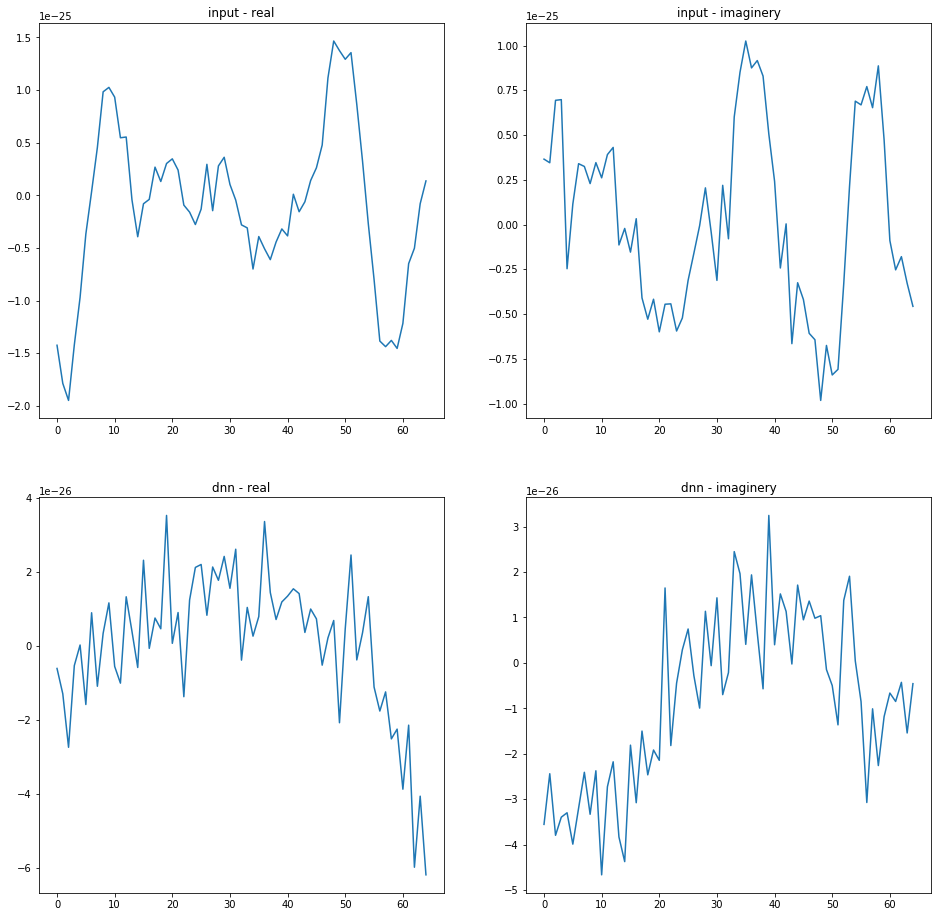

In [6]:
beam_num = 24
segment_num = 63
k = 4

fig, axes = plt.subplots(2, 2, figsize = (16,16))
axes[0, 0].plot(stft_real_old[beam_num, :, segment_num, k]) # is this correct?
axes[0, 0].set_title('input - real')
axes[0, 1].plot(stft_imag_old[beam_num, :, segment_num, k])
axes[0, 1].set_title('input - imaginery')

axes[1, 0].plot(stft_real_new[beam_num, :, segment_num, k]) # is this correct?
axes[1, 0].set_title('dnn - real')
axes[1, 1].plot(stft_imag_new[beam_num, :, segment_num, k])
axes[1, 1].set_title('dnn - imaginery')
plt.show()

# 2. Looking at training data (x, y, y_hat_dnn, and y_hat_cnn)

In [7]:
import h5py
import numpy as np
import os
from torch.utils.data import Dataset
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable

import sys
sys.path.insert(0, '..')
from lib.utils import load_model
from lib.lenet import LeNet


def see_sample(sample_index):
    model = '20181203090415_11_evaluated'
    k = 4
    n_scat = 1 # [1, 2, 3]


    home = os.path.expanduser('~')
    fname = os.path.join(home,'Downloads', '20180402_L74_70mm', 'train_' + str(n_scat) + '.h5')


    # check if files exist
    if not os.path.isfile(fname):
        raise IOError(fname + ' does not exist.')

    # Open file
    with h5py.File(fname, 'r') as f:

        # Get number of samples available for each type
        real_available = f['/' + str(k) + '/X/real'].shape[0]
        imag_available = f['/' + str(k) + '/X/imag'].shape[0]
        samples_available = min(real_available, imag_available)


        # load the data
        inputs_real = f['/' + str(k) + '/X/real'][sample_index]
        inputs_imag = f['/' + str(k) + '/X/imag'][sample_index]

        targets_real = f['/' + str(k) + '/Y/real'][sample_index]
        targets_imag = f['/' + str(k) + '/Y/imag'][sample_index]


    inputs = np.hstack([inputs_real, inputs_imag])
    inputs = inputs[np.newaxis, :]
    inputs = Variable(torch.from_numpy(inputs).float())


    print(inputs.shape)
    x = inputs.cpu().data.numpy()
    x_real = x[0, :65]
    x_imag = x[0, 65:]


    model_cnn = get_which_(os.path.join('..', 'DNNs', model, 'k_' + str(k), 'model_params.json'))
    y_hat = model_cnn(inputs).cpu().data.numpy()


    y_hat_real = y_hat[0, :65]
    y_hat_imag = y_hat[0, 65:]


    fig, axes = plt.subplots(3, 2, figsize=(16,24))
    ylim = (-1, 1)


    axes[0, 0].plot(x_real)
    axes[0, 0].set_title('x - real')
    axes[0, 0].set_ylim(*ylim)
    axes[0, 1].plot(x_imag)
    axes[0, 1].set_title('x - imag')
    axes[0, 1].set_ylim(*ylim)

    axes[1, 0].plot(targets_real)
    axes[1, 0].set_title('y - real')
    axes[1, 0].set_ylim(*ylim)
    axes[1, 1].plot(targets_imag)
    axes[1, 1].set_title('y - imag')
    axes[1, 1].set_ylim(*ylim)

    axes[2, 0].plot(y_hat_real)
    axes[2, 0].set_title('y_hat_cnn - real')
    axes[2, 0].set_ylim(*ylim)
    axes[2, 1].plot(y_hat_imag)
    axes[2, 1].set_title('y_hat_cnn - imag')
    axes[2, 1].set_ylim(*ylim)

    plt.show()

ImportError: cannot import name 'load_model' from 'lib.utils' (../lib/utils.py)

# (TODO) Good model, average model, bad model, vs good DNN model

In [ ]:
see_sample(0)

In [ ]:
see_sample(5)

In [ ]:
see_sample(6)

# Bad Image